<a href="https://colab.research.google.com/github/tomat8jpg/HW_RiboSEQ/blob/main/Riboseq_part2_Taran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:19
🔁 Restarting kernel...


In [1]:
!mkdir /content/files

In [2]:
%cd /content/drive/MyDrive/Riboweq

/content/drive/MyDrive/Riboweq


In [3]:
!cp HSE_RiboSeq_HT.zip cpHSE_RiboSeq_HT.zip

In [4]:
!mv cpHSE_RiboSeq_HT.zip /content/files

In [5]:
%cd /content/files

/content/files


In [6]:
!unzip cpHSE_RiboSeq_HT.zip

Archive:  cpHSE_RiboSeq_HT.zip
   creating: HSE_RiboSeq_HT/
  inflating: __MACOSX/._HSE_RiboSeq_HT  
  inflating: HSE_RiboSeq_HT/02. RiboSeq_EColi_track_r.wig  
  inflating: __MACOSX/HSE_RiboSeq_HT/._02. RiboSeq_EColi_track_r.wig  
  inflating: HSE_RiboSeq_HT/02. RiboSeq_EColi_track_f.wig  
  inflating: __MACOSX/HSE_RiboSeq_HT/._02. RiboSeq_EColi_track_f.wig  
  inflating: HSE_RiboSeq_HT/01. RiboSeq_RNASeq_HCC_counts.tsv  
  inflating: __MACOSX/HSE_RiboSeq_HT/._01. RiboSeq_RNASeq_HCC_counts.tsv  


In [7]:
!pip install Bio
!pip install gffpandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.1/273.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 41.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.8/178.8 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gffpandas: filename=gffpandas-1.2.0-py2.py3-none-any.whl size=6248 sha256=dc92664356bf852e502177ec2b712221085f06f0e4929ba17146c411d55b8138
  Stored in directory: /root/.cache/pip/wheels/72/1f/d9/720b46dd9a4a33d141caabe4b65843eeef62cd20037cb6953d
Successfully built gffpandas


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Bio import SeqIO
import gffpandas.gffpandas as gffpd

In [9]:
forw = pd.read_csv('/content/files/HSE_RiboSeq_HT/02. RiboSeq_EColi_track_f.wig', sep='\t', skiprows=[0], names=['position', 'count']
)
rev = pd.read_csv('/content/files/HSE_RiboSeq_HT/02. RiboSeq_EColi_track_r.wig', sep='\t',  skiprows=[0], names=['position', 'count']
)
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz
!gunzip GCF_000005845.2_ASM584v2_genomic.gff.gz



--2022-12-13 09:44:33--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 130.14.250.10, 2607:f220:41f:250::228, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 433547 (423K) [application/x-gzip]
Saving to: ‘GCF_000005845.2_ASM584v2_genomic.gff.gz’

GCF_000005845.2_ASM 100%[===================>] 423.39K  --.-KB/s    in 0.07s   

2022-12-13 09:44:35 (5.70 MB/s) - ‘GCF_000005845.2_ASM584v2_genomic.gff.gz’ saved [433547/433547]



In [10]:
annotation = gffpd.read_gff3('GCF_000005845.2_ASM584v2_genomic.gff').df
annotation.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
0,NC_000913.3,RefSeq,region,1,4641652,.,+,.,ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;...
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...


In [11]:
annotation = annotation.loc[annotation['type']=='CDS']
annotation.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...
6,NC_000913.3,RefSeq,CDS,2801,3733,.,+,0,ID=cds-NP_414544.1;Parent=gene-b0003;Dbxref=Un...
8,NC_000913.3,RefSeq,CDS,3734,5020,.,+,0,ID=cds-NP_414545.1;Parent=gene-b0004;Dbxref=Un...
10,NC_000913.3,RefSeq,CDS,5234,5530,.,+,0,ID=cds-NP_414546.1;Parent=gene-b0005;Dbxref=Un...


Присутствует ли в покрытии генома неравномерность?
Рассмотрите неравномерность покрытия на примере любого выбранного вами
гена. Что вы можете сказать про эту неравномерность? Присутствует ли там
периодичность в три нуклеотида? А если взять среднее по большому
количеству генов (взяв за точку отсчёта старт-кодон)? Выводы
проиллюстрируйте графиками.

In [12]:
one_gene_f = forw[forw['position'].between(annotation['start'][10], annotation['end'][10])]
one_gene_r = rev[rev['position'].between(annotation['start'][10], annotation['end'][10])]


In [13]:
onegenefr = pd.concat([one_gene_f, one_gene_r], axis=0)
onegenefr

,position,count
3772,5240,1
3773,5248,1
3774,5257,2
3775,5264,1
3776,5271,3
...,...,...
31,5485,1
32,5496,1
33,5498,5
34,5507,1


In [14]:
import seaborn as sns

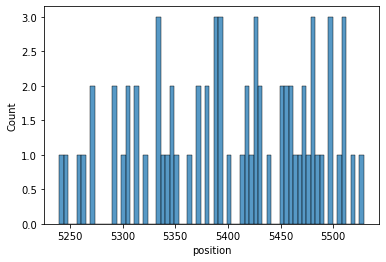

In [15]:
sns.histplot(data = onegenefr, x = 'position', bins = onegenefr.shape[0])

сильной неравномерности покрытия одного гена не детектируется глазами.  
периодичность в три нуклеотида только местами наблюдается

In [16]:
annotation['length'] = annotation['end'] - annotation['start']
annotation.head()

,seq_id,source,type,start,end,score,strand,phase,attributes,length
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...,65
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...,2462
6,NC_000913.3,RefSeq,CDS,2801,3733,.,+,0,ID=cds-NP_414544.1;Parent=gene-b0003;Dbxref=Un...,932
8,NC_000913.3,RefSeq,CDS,3734,5020,.,+,0,ID=cds-NP_414545.1;Parent=gene-b0004;Dbxref=Un...,1286
10,NC_000913.3,RefSeq,CDS,5234,5530,.,+,0,ID=cds-NP_414546.1;Parent=gene-b0005;Dbxref=Un...,296


In [17]:
annsorted = annotation.sort_values('length', ascending=False)
annsorted.head()

,seq_id,source,type,start,end,score,strand,phase,attributes,length
4290,NC_000913.3,RefSeq,CDS,2044938,2052014,.,+,0,ID=cds-NP_416485.4;Parent=gene-b1978;Dbxref=Un...,7076
5446,NC_000913.3,RefSeq,CDS,2647326,2652287,.,-,0,ID=cds-NP_417015.1;Parent=gene-b2520;Dbxref=Un...,4961
3593,NC_000913.3,RefSeq,CDS,1729087,1733703,.,+,0,ID=cds-NP_416170.1;Parent=gene-b1653;Dbxref=Un...,4616
5732,NC_000913.3,RefSeq,CDS,2778146,2782726,.,-,0,ID=cds-NP_417134.2;Parent=gene-b2647;Dbxref=Un...,4580
6406,NC_000913.3,RefSeq,CDS,3114550,3119112,.,-,0,ID=cds-YP_026189.1;Parent=gene-b4466;Dbxref=Un...,4562


In [18]:
forrev = pd.concat([forw, rev], axis = 0)
forrev = forrev.sort_values('position', ascending=True)

In [20]:
probe = forrev.loc[forrev['position'] == 1212]

In [21]:
probe # pd.concat не суммирует значения каунтов для одной позиции, но это не нужно, т.к. следующие функции будут по значению позиции искать все каунты и суммировать их. 
# Дублеты по позициям не должны помешать

,position,count
1,1212,1
784,1212,1


<ipython-input-22-65081de5ea2f>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  gene_counts['count {}'.format(i)] = position_counts['count']


<BarContainer object of 7075 artists>

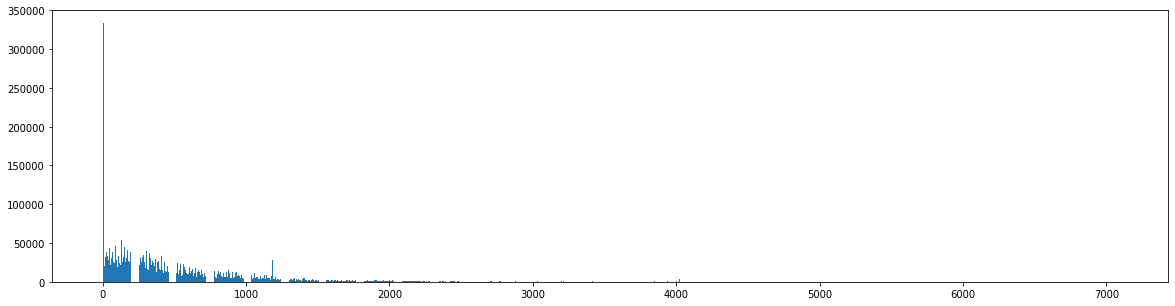

In [22]:
gene_counts = pd.DataFrame({'position' : np.arange(1, 7076)}) 
for i in annsorted.index: 
  start, end = annsorted['start'][i], annsorted['end'][i] 
  genes = forrev.loc[(forrev['position' ]>= start) & (forrev['position'] <= end)] 
  position_counts = pd.DataFrame({'position' : np.arange(start, end+1), 'count' : [0] * (end+1-start)})
  position_counts = pd.concat([position_counts, genes], axis = 0).drop_duplicates(subset='position',keep='last').sort_values('position')
  position_counts.fillna(value=0) 
  position_counts.reset_index(drop= True , inplace= True)
  gene_counts['count {}'.format(i)] = position_counts['count'] 

gene_counts.fillna(0, inplace=True)
del gene_counts['position']
gene_counts['sum'] = gene_counts.sum(axis=1)

fig, ax = plt.subplots(figsize=(20, 5))
x = np.arange(1, 7076)
ax.bar(x, gene_counts['sum'])

Ничего не понятно, попробуем сделать для меньшего диапазона. Видно, что больше ридов приходится на начало гена. Это из-за того, что начало гена в позиции 0 есть у всех генов а конец в позиции 7к не у всех (длинных генов меньше).

In [23]:
counts200 = annsorted.loc[((annsorted['length'] > 100) & (annsorted['length'] < 200))] 
counts200

,seq_id,source,type,start,end,score,strand,phase,attributes,length
3262,NC_000913.3,RefSeq,CDS,1583762,1583959,.,-,0,ID=cds-NP_416017.1;Parent=gene-b1500;Dbxref=Un...,197
9003,NC_000913.3,RefSeq,CDS,4404386,4404583,.,+,0,ID=cds-NP_418597.1;Parent=gene-b4176;Dbxref=Un...,197
3733,NC_000913.3,RefSeq,CDS,1799802,1799999,.,-,0,ID=cds-NP_416232.3;Parent=gene-b1717;Dbxref=Un...,197
216,NC_000913.3,RefSeq,CDS,111649,111846,.,-,0,ID=cds-NP_414643.1;Parent=gene-b0101;Dbxref=Un...,197
4330,NC_000913.3,RefSeq,CDS,2070277,2070474,.,+,0,ID=cds-gnl|b4582|CDS%3D2117;Parent=gene-b4582;...,197
...,...,...,...,...,...,...,...,...,...,...
662,NC_000913.3,RefSeq,CDS,313141,313242,.,-,0,ID=cds-YP_002791238.1;Parent=gene-b4671;Dbxref...,101
1179,NC_000913.3,RefSeq,CDS,572368,572469,.,+,0,ID=cds-YP_001165308.1;Parent=gene-b4588;Dbxref...,101
8143,NC_000913.3,RefSeq,CDS,3966231,3966332,.,+,0,ID=cds-YP_009518827.1;Parent=gene-b3782;Dbxref...,101
3485,NC_000913.3,RefSeq,CDS,1673608,1673709,.,-,0,ID=cds-YP_010051187.1;Parent=gene-b4777;Dbxref...,101


In [24]:
gene_counts = pd.DataFrame({'position' : np.arange(1, 198)}) 
for i in counts200.index: 
  start, end = counts200['start'][i], counts200['end'][i] 
  genes = forrev.loc[(forrev['position' ]>= start) & (forrev['position'] <= end)] 
  position_counts = pd.DataFrame({'position' : np.arange(start, end+1), 'count' : [0] * (end+1-start)})
  position_counts = pd.concat([position_counts, genes], axis = 0).drop_duplicates(subset='position',keep='last').sort_values('position')
  position_counts.fillna(value=0) 
  position_counts.reset_index(drop= True , inplace= True)
  gene_counts['count {}'.format(i)] = position_counts['count'] 



<ipython-input-24-ff4f75eff29f>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  gene_counts['count {}'.format(i)] = position_counts['count']


In [25]:
gene_counts.fillna(0, inplace=True)
del gene_counts['position']
gene_counts['sum'] = gene_counts.sum(axis=1)
gene_counts.head()

,count 3262,count 9003,count 3733,count 216,count 4330,count 1303,count 7158,count 4355,count 3643,count 1215,...,count 3330,count 3874,count 2782,count 7375,count 662,count 1179,count 8143,count 3485,count 9318,sum
0,0,1,46,1,0,9,2.0,0.0,6.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,2678.0
1,0,0,58,1,0,2,1.0,0.0,0.0,0.0,...,77.0,0.0,0.0,0.0,0.0,0.0,14.0,15.0,0.0,1605.0
2,0,6,105,0,0,0,4.0,0.0,0.0,1.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,951.0
3,0,0,93,0,0,1,9.0,0.0,2.0,0.0,...,16.0,0.0,1.0,0.0,0.0,0.0,14.0,11.0,0.0,1016.0
4,0,1,421,1,0,0,6.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,17514.0


In [26]:
gene_counts.shape

(197, 147)

<BarContainer object of 197 artists>

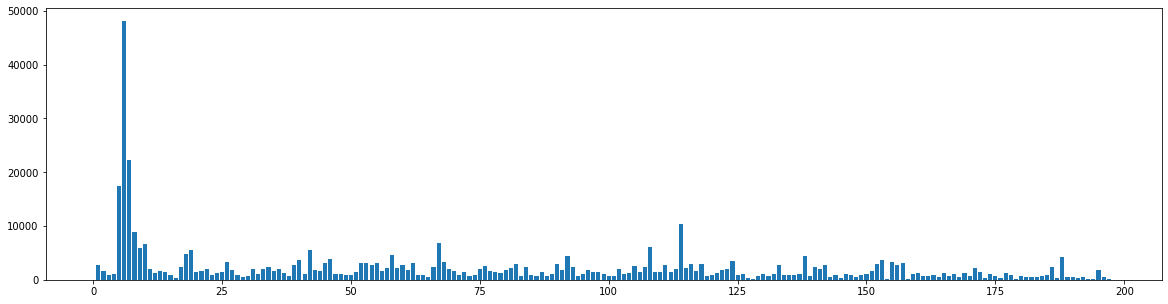

In [27]:
fig, ax = plt.subplots(figsize=(20, 5))
x = np.arange(1, 198)
ax.bar(x, gene_counts['sum'])

Периодичность в 3 нуклеотида не наблюдается

### Рассчитайте значения RPKM и TPM для каждого гена. В чём
разница между RPKM и TPM?

RPKM - Reads Per Kilobase Million, нормировка идет сначала на глубину прочтения, потом на длину, подходит для сравнения покрытия разных генов внутри одного набора прочтений  
TPM - Transcripts Per Kilobase Million, как RPKM, только наоборот, позволяет сравнивать одни гены в разных образцах



In [41]:
counts = annotation.drop(['type', 'source', 'score', 'strand', 'phase'], axis = 1)
counts['length'] = counts['end'] - counts['start']
counts.head()

,seq_id,start,end,attributes,length
2,NC_000913.3,190,255,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...,65
4,NC_000913.3,337,2799,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...,2462
6,NC_000913.3,2801,3733,ID=cds-NP_414544.1;Parent=gene-b0003;Dbxref=Un...,932
8,NC_000913.3,3734,5020,ID=cds-NP_414545.1;Parent=gene-b0004;Dbxref=Un...,1286
10,NC_000913.3,5234,5530,ID=cds-NP_414546.1;Parent=gene-b0005;Dbxref=Un...,296


In [42]:
counts.reset_index(drop=True, inplace=True)

In [43]:
reads = list()
for i in counts.index: 
  start = counts['start'][i]
  end = counts['end'][i] 
  genes = forrev.loc[(forrev['position' ]>= start) & (forrev['position'] <= end)]
  reads.append(genes.shape[0])
counts['reads'] = reads
counts.head()

,seq_id,start,end,attributes,length,reads
0,NC_000913.3,190,255,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...,65,49
1,NC_000913.3,337,2799,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...,2462,1913
2,NC_000913.3,2801,3733,ID=cds-NP_414544.1;Parent=gene-b0003;Dbxref=Un...,932,628
3,NC_000913.3,3734,5020,ID=cds-NP_414545.1;Parent=gene-b0004;Dbxref=Un...,1286,1061
4,NC_000913.3,5234,5530,ID=cds-NP_414546.1;Parent=gene-b0005;Dbxref=Un...,296,69


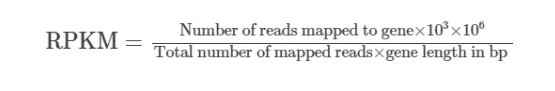

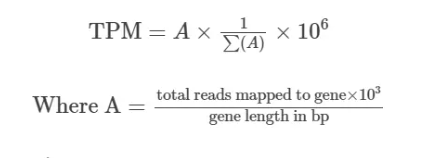

In [44]:
counts["RPKM"] = counts["reads"] / (counts["length"] / 1000 * (counts["reads"].sum() / 1000000))
counts["TPM"] = counts["reads"] / (counts["length"] / 1000)
counts["TPM"] /= counts["TPM"].sum() / 1000000

In [45]:
counts.head()

,seq_id,start,end,attributes,length,reads,RPKM,TPM
0,NC_000913.3,190,255,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...,65,49,651.005511,571.593968
1,NC_000913.3,337,2799,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...,2462,1913,671.009800,589.158076
2,NC_000913.3,2801,3733,ID=cds-NP_414544.1;Parent=gene-b0003;Dbxref=Un...,932,628,581.896404,510.914990
3,NC_000913.3,3734,5020,ID=cds-NP_414545.1;Parent=gene-b0004;Dbxref=Un...,1286,1061,712.486036,625.574920
4,NC_000913.3,5234,5530,ID=cds-NP_414546.1;Parent=gene-b0005;Dbxref=Un...,296,69,201.307206,176.751168


### Проанализируйте значения RPKM для генов из оперона ATP.
Укажите геномные координаты оперона, а также то, какие гены в него входят.
Есть ли разница между RPKM у различных генов, присутствующих в опероне?
Как вы можете объяснить эту разницу с биологической точки зрения? Как вы
думаете, можно ли оценить эту разницу при помощи классического RNA-Seq?

In [46]:
atp = counts.loc[counts['attributes'].str.contains('atp')]
atp.sort_values('start')
atp

,seq_id,start,end,attributes,length,reads,RPKM,TPM
3699,NC_000913.3,3915553,3915972,ID=cds-NP_418187.1;Parent=gene-b3731;Dbxref=Un...,419,386,795.564185,698.518954
3700,NC_000913.3,3915993,3917375,ID=cds-NP_418188.1;Parent=gene-b3732;Dbxref=Un...,1382,1336,834.834440,732.998910
3701,NC_000913.3,3917402,3918265,ID=cds-NP_418189.1;Parent=gene-b3733;Dbxref=Un...,863,735,735.492901,645.775340
3702,NC_000913.3,3918316,3919857,ID=cds-NP_418190.1;Parent=gene-b3734;Dbxref=Un...,1541,1460,818.186216,718.381485
3703,NC_000913.3,3919870,3920403,ID=cds-NP_418191.1;Parent=gene-b3735;Dbxref=Un...,533,460,745.302477,654.388316
3704,NC_000913.3,3920418,3920888,ID=cds-NP_418192.1;Parent=gene-b3736;Dbxref=Un...,470,426,782.733070,687.253017
3705,NC_000913.3,3920950,3921189,ID=cds-NP_418193.1;Parent=gene-b3737;Dbxref=Un...,239,240,867.192040,761.409435
3706,NC_000913.3,3921236,3922051,ID=cds-NP_418194.1;Parent=gene-b3738;Dbxref=Un...,815,755,800.002390,702.415775
3707,NC_000913.3,3922060,3922440,ID=cds-NP_418195.2;Parent=gene-b3739;Dbxref=Un...,380,146,331.796042,291.322597


Геномные координаты = (3915553, 3922440)






In [52]:
probe = atp.copy()

In [51]:
p = probe.at[3699, 'attributes']
p

'ID=cds-NP_418187.1;Parent=gene-b3731;Dbxref=UniProtKB/Swiss-Prot:P0A6E6,Genbank:NP_418187.1,ASAP:ABE-0012206,ECOCYC:EG10100,GeneID:948245;Name=NP_418187.1;gbkey=CDS;gene=atpC;locus_tag=b3731;orig_transcript_id=gnl|b3731|mrna.NP_418187;product=ATP synthase F1 complex subunit epsilon;protein_id=NP_418187.1;transl_table=11'

In [53]:
probe[['a', 'b', 'c', 'd', 'e', 'gene', 'f', 'g', 'product', 'h', 'i']] = probe['attributes'].str.split(';', expand=True)
probe.head()

,seq_id,start,end,attributes,length,reads,RPKM,TPM,a,b,c,d,e,gene,f,g,product,h,i
3699,NC_000913.3,3915553,3915972,ID=cds-NP_418187.1;Parent=gene-b3731;Dbxref=Un...,419,386,795.564185,698.518954,ID=cds-NP_418187.1,Parent=gene-b3731,"Dbxref=UniProtKB/Swiss-Prot:P0A6E6,Genbank:NP_...",Name=NP_418187.1,gbkey=CDS,gene=atpC,locus_tag=b3731,orig_transcript_id=gnl|b3731|mrna.NP_418187,product=ATP synthase F1 complex subunit epsilon,protein_id=NP_418187.1,transl_table=11
3700,NC_000913.3,3915993,3917375,ID=cds-NP_418188.1;Parent=gene-b3732;Dbxref=Un...,1382,1336,834.834440,732.998910,ID=cds-NP_418188.1,Parent=gene-b3732,"Dbxref=UniProtKB/Swiss-Prot:P0ABB4,Genbank:NP_...",Name=NP_418188.1,gbkey=CDS,gene=atpD,locus_tag=b3732,orig_transcript_id=gnl|b3732|mrna.NP_418188,product=ATP synthase F1 complex subunit beta,protein_id=NP_418188.1,transl_table=11
3701,NC_000913.3,3917402,3918265,ID=cds-NP_418189.1;Parent=gene-b3733;Dbxref=Un...,863,735,735.492901,645.775340,ID=cds-NP_418189.1,Parent=gene-b3733,"Dbxref=UniProtKB/Swiss-Prot:P0ABA6,Genbank:NP_...",Name=NP_418189.1,gbkey=CDS,gene=atpG,locus_tag=b3733,orig_transcript_id=gnl|b3733|mrna.NP_418189,product=ATP synthase F1 complex subunit gamma,protein_id=NP_418189.1,transl_table=11
3702,NC_000913.3,3918316,3919857,ID=cds-NP_418190.1;Parent=gene-b3734;Dbxref=Un...,1541,1460,818.186216,718.381485,ID=cds-NP_418190.1,Parent=gene-b3734,"Dbxref=UniProtKB/Swiss-Prot:P0ABB0,Genbank:NP_...",Name=NP_418190.1,gbkey=CDS,gene=atpA,locus_tag=b3734,orig_transcript_id=gnl|b3734|mrna.NP_418190,product=ATP synthase F1 complex subunit alpha,protein_id=NP_418190.1,transl_table=11
3703,NC_000913.3,3919870,3920403,ID=cds-NP_418191.1;Parent=gene-b3735;Dbxref=Un...,533,460,745.302477,654.388316,ID=cds-NP_418191.1,Parent=gene-b3735,"Dbxref=UniProtKB/Swiss-Prot:P0ABA4,Genbank:NP_...",Name=NP_418191.1,gbkey=CDS,gene=atpH,locus_tag=b3735,orig_transcript_id=gnl|b3735|mrna.NP_418191,product=ATP synthase F1 complex subunit delta,protein_id=NP_418191.1,transl_table=11


In [ ]:
probe.drop(['attributes', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'], axis=1, inplace=True)


In [56]:
probe

,seq_id,start,end,length,reads,RPKM,TPM,gene,product
3699,NC_000913.3,3915553,3915972,419,386,795.564185,698.518954,gene=atpC,product=ATP synthase F1 complex subunit epsilon
3700,NC_000913.3,3915993,3917375,1382,1336,834.834440,732.998910,gene=atpD,product=ATP synthase F1 complex subunit beta
3701,NC_000913.3,3917402,3918265,863,735,735.492901,645.775340,gene=atpG,product=ATP synthase F1 complex subunit gamma
3702,NC_000913.3,3918316,3919857,1541,1460,818.186216,718.381485,gene=atpA,product=ATP synthase F1 complex subunit alpha
3703,NC_000913.3,3919870,3920403,533,460,745.302477,654.388316,gene=atpH,product=ATP synthase F1 complex subunit delta
3704,NC_000913.3,3920418,3920888,470,426,782.733070,687.253017,gene=atpF,product=ATP synthase Fo complex subunit b
3705,NC_000913.3,3920950,3921189,239,240,867.192040,761.409435,gene=atpE,product=ATP synthase Fo complex subunit c
3706,NC_000913.3,3921236,3922051,815,755,800.002390,702.415775,gene=atpB,product=ATP synthase Fo complex subunit a
3707,NC_000913.3,3922060,3922440,380,146,331.796042,291.322597,gene=atpI,product=ATP synthase accessory factor AtpI


Text(0, 0.5, 'TPM')

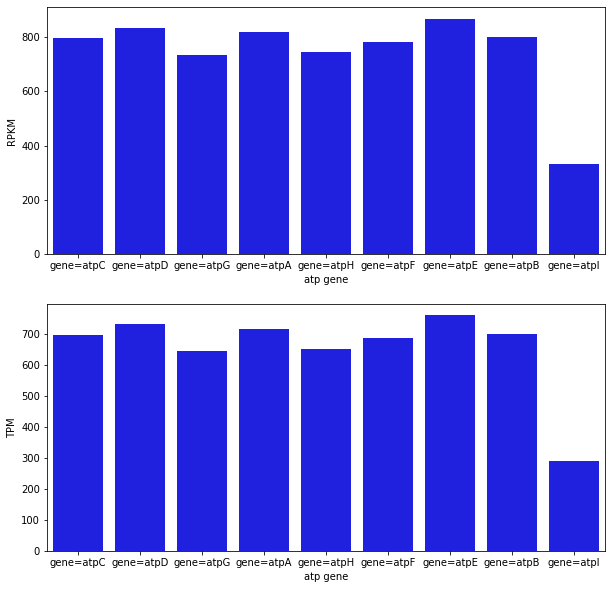

In [63]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(10, 10))

sns.barplot(data = probe, x='gene', y='RPKM', linewidth=0, color="blue", ax=axes[0])
axes[0].set_xlabel("atp gene")
axes[0].set_ylabel("RPKM")


sns.barplot(data = probe, x='gene', y='TPM', linewidth=0, color="blue", ax=axes[1])
axes[1].set_xlabel("atp gene")
axes[1].set_ylabel("TPM")


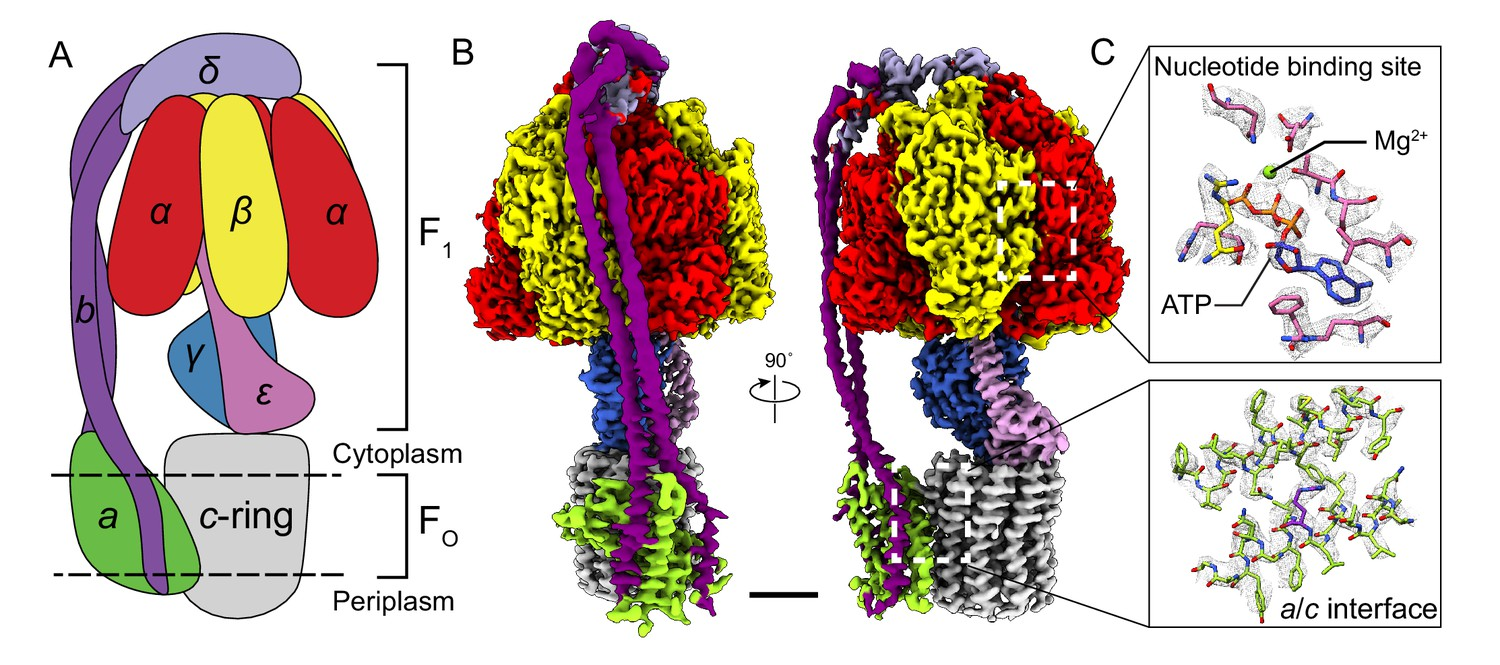

Все гены, кроме atpI входят в состав комплекса атф-синтазы и соответственно имеют схожие значения RPKM и TPM. Т.е. эти гены транслируются с одинаковой эффективностью. Ген atpI имеет самый низкий уровень трансляции (низкие значения нормированных каунтов). Судя по беглому обзору литературы и NCBI, этот белок не является критично необходимым для работы комплекса атф синтазы, т.к. если его убрать, такие штаммы тоже живут (https://www.researchgate.net/publication/232812525_Roles_of_AtpI_and_Two_YidC-Type_Proteins_from_Alkaliphilic_Bacillus_pseudofirmus_OF4_in_ATP_Synthase_Assembly_and_Nonfermentative_Growth).   